In [8]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from keras.applications import resnet
from keras.applications.resnet import preprocess_input
from sklearn.metrics import  classification_report

In [12]:
file_path = r'F:\New Dataset\archive\plantvillage dataset\color\Plant Village'

In [13]:
name_class = os.listdir(file_path)
name_class

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [14]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [15]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,F:\New Dataset\archive\plantvillage dataset\co...,"Pepper,_bell___healthy"
1,F:\New Dataset\archive\plantvillage dataset\co...,Tomato___Septoria_leaf_spot
2,F:\New Dataset\archive\plantvillage dataset\co...,Potato___Late_blight
3,F:\New Dataset\archive\plantvillage dataset\co...,Orange___Haunglongbing_(Citrus_greening)
4,F:\New Dataset\archive\plantvillage dataset\co...,Tomato___Late_blight


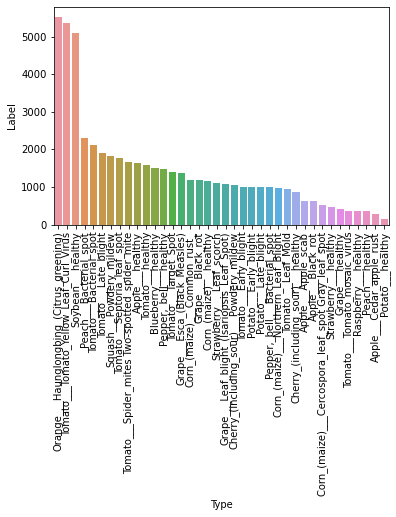

In [16]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [17]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

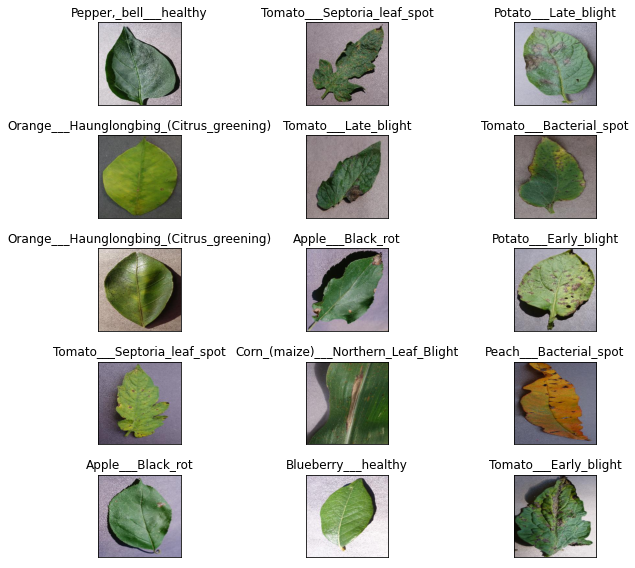

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [19]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [20]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 40728 validated image filenames belonging to 38 classes.
Found 40728 validated image filenames belonging to 38 classes.
Found 13577 validated image filenames belonging to 38 classes.


In [23]:
pretrained_model = resnet.ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94781440/94765736 [==============================] - 3s 0us/step


In [31]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(38, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [32]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [33]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [34]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,
    callbacks=my_callbacks
)

Epoch 1/10
1273/1273 [==============================] - 295s 230ms/step - loss: 0.0295 - accuracy: 0.8332 - val_loss: 0.0133 - val_accuracy: 0.9279
Epoch 2/10
1273/1273 [==============================] - 95s 74ms/step - loss: 0.0111 - accuracy: 0.9375 - val_loss: 0.0074 - val_accuracy: 0.9618
Epoch 3/10
1273/1273 [==============================] - 94s 73ms/step - loss: 0.0079 - accuracy: 0.9563 - val_loss: 0.0055 - val_accuracy: 0.9733
Epoch 4/10
1273/1273 [==============================] - 94s 74ms/step - loss: 0.0059 - accuracy: 0.9689 - val_loss: 0.0057 - val_accuracy: 0.9701
Epoch 5/10
1273/1273 [==============================] - 95s 74ms/step - loss: 0.0048 - accuracy: 0.9758 - val_loss: 0.0037 - val_accuracy: 0.9827
Epoch 6/10
1273/1273 [==============================] - 95s 75ms/step - loss: 0.0039 - accuracy: 0.9802 - val_loss: 0.0027 - val_accuracy: 0.9865
Epoch 7/10
1273/1273 [==============================] - 284s 223ms/step - loss: 0.0032 - accuracy: 0.9842 - val_loss: 0.00

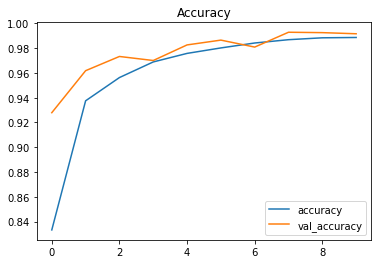

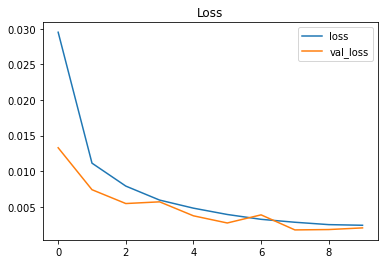

In [35]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [36]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.01021
Test Accuracy: 98.35%


In [37]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [38]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.89      0.93      0.91       169
                                 Apple___Black_rot       0.96      0.95      0.95       156
                          Apple___Cedar_apple_rust       0.95      0.89      0.92        65
                                   Apple___healthy       0.92      0.95      0.94       382
                               Blueberry___healthy       0.96      0.99      0.98       390
          Cherry_(including_sour)___Powdery_mildew       0.99      0.96      0.97       279
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       212
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.83      0.83       131
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       302
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.88      0.

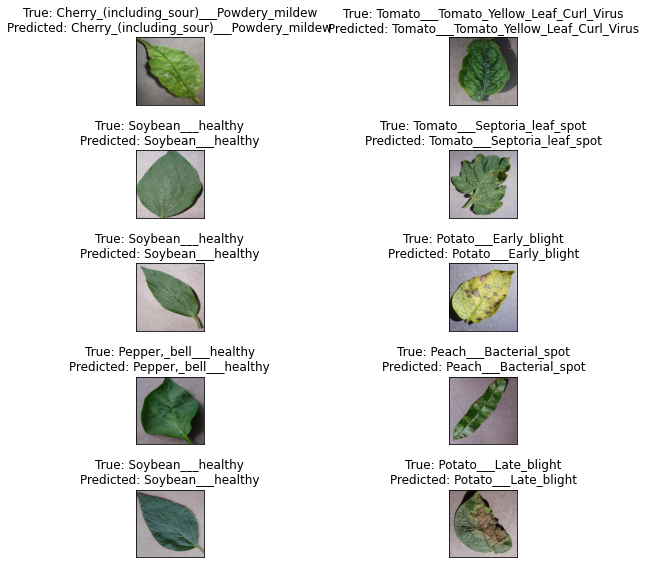

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [40]:
print("[INFO] Saving model...")

model.save(f'F:\Trained Models\\Color_{results[1] * 100}.h5')
print('Model Saved!')

[INFO] Saving model...


C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Model Saved!


Testing by Loading Model


In [49]:
# load model
from tensorflow import keras
savedModel=keras.models.load_model(f'F:\\Trained Models\\Color_{results[1] * 100}.h5')
print('Model Loaded')

Model Loaded


In [50]:
labels

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [51]:
# Predict the label of the test_gen
pred = savedModel.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [52]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.89      0.93      0.91       169
                                 Apple___Black_rot       0.96      0.95      0.95       156
                          Apple___Cedar_apple_rust       0.95      0.89      0.92        65
                                   Apple___healthy       0.92      0.95      0.94       382
                               Blueberry___healthy       0.96      0.99      0.98       390
          Cherry_(including_sour)___Powdery_mildew       0.99      0.96      0.97       279
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       212
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.83      0.83       131
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       302
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.88      0.

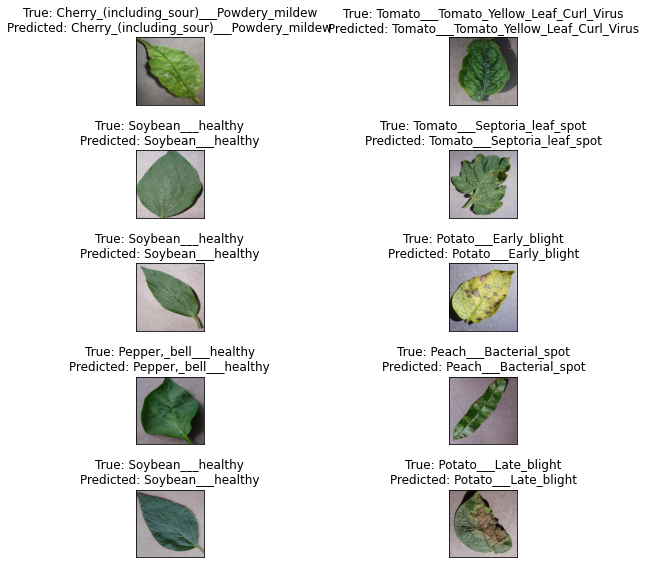

In [53]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()